In [1]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar, Profiler
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
from dask.distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 31.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41387,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 31.00 GiB
Comm: tcp://127.0.0.1:44907,Total threads: 2
Dashboard: http://127.0.0.1:44095/status,Memory: 7.75 GiB
Nanny: tcp://127.0.0.1:46147,


### Here we define util functions used to preprocess data for the specific needs

In [3]:
def filter_dataframe_by_datetime_bounds(data: dd.DataFrame, start_date: datetime, end_date: datetime) -> dd.DataFrame:

    # Create a mask for filtering the DataFrame based on the datetime bounds
    mask = (data['tweetcreatedts'] >= start_date) & (data['tweetcreatedts'] <= end_date)

    return data.loc[mask]

In [20]:
%%time
dfp = dd.read_parquet('../parquet/tweets.parquet', engine='pyarrow')

CPU times: user 44.4 ms, sys: 15.6 ms, total: 59.9 ms
Wall time: 44.2 ms


In [5]:
dfp.npartitions

662

In [6]:
dfp.head(5)

,userid,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,is_retweet,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,1237027988287471618,1579622809680035841,2022-10-11,11,Después de profanar la Mezquita de Ibrahim en ...,"[{'text': 'palestina', 'indices': [142, 152]},...",es,,13,True,...,0,,0,0,,True,0,0,,2022-10-11 09:57:02
1,1407899290790473732,1579622809847808000,2022-10-11,1,La voix de son maître 🇺🇸\nAlors que l'#Ukraine...,"[{'text': 'Ukraine', 'indices': [37, 45]}, {'t...",fr,,0,True,...,0,,0,0,,True,0,0,,2022-10-11 02:31:18
2,6509832,1579622810560786432,2022-10-11,1,#WarInUkraine | Putin Confirms Russia Attacked...,"[{'text': 'WarInUkraine', 'indices': [0, 13]},...",en,,5,True,...,0,,0,0,,True,0,0,,2022-10-11 04:37:34
3,1570222426570608641,1579622810619723776,2022-10-11,1,We made a set of heart-shaped pinatas with the...,"[{'text': 'WeStandWithUkraine', 'indices': [16...",en,,4,True,...,0,,0,0,,True,0,0,,2022-10-11 05:41:38
4,20918680,1579622810774749184,2022-10-11,0,Have you listened to @AmandaMcBroom1 &amp; @Mi...,"[{'text': 'GodofWar', 'indices': [80, 89]}, {'...",en,,0,True,...,0,,0,0,,True,0,0,,2022-10-11 02:31:18


In [21]:
dfp.columns

Index(['userid', 'tweetid', 'tweetcreatedts', 'retweetcount', 'text',
       'hashtags', 'language', 'coordinates', 'favorite_count', 'is_retweet',
       'original_tweet_id', 'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts'],
      dtype='object')

In [8]:
# Data cleaning process

start_date = datetime(2022, 2, 1)
end_date = datetime(2023, 5, 1)

dfp = filter_dataframe_by_datetime_bounds(dfp, start_date, end_date)

In [9]:
dfp = dfp.compute()

,userid,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,is_retweet,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
28072,253452288,1627820394538479618,2023-02-21,0,เรื่องที่ขอ จาก #พีททองเจือ ถึงมนุษย์ต่างดาว\n...,"[{'text': 'พีททองเจือ', 'indices': [16, 27]}, ...",th,,1,True,...,0,,0,0,,True,0,0,,2023-02-21 01:16:28
28073,1282574131599486977,1627820395096072192,2023-02-21,0,Russia’s combat losses in #UkraineWar on all f...,"[{'text': 'UkraineWar', 'indices': [26, 37]}, ...",en,,0,True,...,0,,0,0,,True,0,0,,2023-02-21 07:25:33
28074,704377198141026305,1627820395754582016,2023-02-21,0,"Biden: Kiev, Ucrania, los ucranianos, y la dem...","[{'text': 'ucrania', 'indices': [72, 80]}, {'t...",es,,1,True,...,0,,0,0,,True,0,0,,2023-02-21 11:25:05
28075,60017224,1627820395993915392,2023-02-21,0,#Belarus' authoritarian president said on Mond...,"[{'text': 'Belarus', 'indices': [0, 8]}, {'tex...",en,,0,True,...,0,,0,0,,True,0,0,,2023-02-21 01:35:23
28076,22240612,1627820396392116225,2023-02-21,3,#Russia's officials and state media downplay P...,"[{'text': 'Russia', 'indices': [0, 7]}, {'text...",en,,4,True,...,0,,0,0,,True,0,0,,2023-02-21 06:55:34


In [22]:
type(dfp)

pandas.core.frame.DataFrame

In [20]:
# %%time
# # write Februrary 2023 data to disk
# # type(dfp) => pandas.core.frame.DataFrame
#
# dfp.to_parquet(
#     '../parquet/tweets_feb2023.parquet',
#     engine='pyarrow',
#     compression=None,
# )

CPU times: user 7.38 s, sys: 3.88 s, total: 11.3 s
Wall time: 16 s


In [23]:
%%time

# Earliest and Latest tweet
earliest_tweet = dfp["tweetcreatedts"].min()
latest_tweet = dfp["tweetcreatedts"].max()

print(f"The earliest tweet was at {earliest_tweet}, and the latest was at {latest_tweet}")

The earliest tweet was at 2023-02-01 00:00:00, and the latest was at 2023-02-28 00:00:00
CPU times: user 56.8 ms, sys: 4.54 ms, total: 61.3 ms
Wall time: 63.2 ms


In [22]:
# select columns for activity analysis
cols = ['userid', 'tweetid', 'retweetcount', 'favorite_count']

# dfp here is already filtered for only february 2023 dates and computed!
dfp_reduced = filter_dataframe_by_datetime_bounds(dfp, datetime(2022, 2, 1), datetime(2023, 5, 2))[cols]

In [24]:
dfp_reduced.columns

Index(['userid', 'tweetid', 'retweetcount', 'favorite_count'], dtype='object')

In [31]:
dfp.shape

(4462306, 21)

In [32]:
dfp_reduced.shape

(86698, 5)

In [25]:
# dfp_activity = dfp_reduced.assign(activity_count=lambda x: x['retweetcount'] + x['favorite_count'])
dfp_reduced['activity_count'] = dfp_reduced['retweetcount'] + dfp_reduced['favorite_count']
dfp_reduced = dfp_reduced.drop(['retweetcount', 'favorite_count'], axis=1)

In [26]:
dfp_reduced = dfp_reduced.compute()

2023-05-02 18:16:41,453 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 6.22 GiB -- Worker memory limit: 7.75 GiB
2023-05-02 18:16:49,021 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 6.20 GiB -- Worker memory limit: 7.75 GiB
2023-05-02 18:16:50,255 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 4.92 GiB -- Worker memory limit: 7.75 GiB
2023-05-02 18:16:57,196 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memo

In [27]:
dfp_activity = dfp_reduced.groupby("userid").sum("activity_count")
activity = dfp_activity.value_counts()
# x = activity["activity_count"]
# y = activity["count"]
activity

activity_count
0                 1141911
2                  412997
4                  233858
6                  147630
8                  108313
                   ...   
241476                  1
241478                  1
241480                  1
241482                  1
48761326                1
Name: count, Length: 145623, dtype: int64

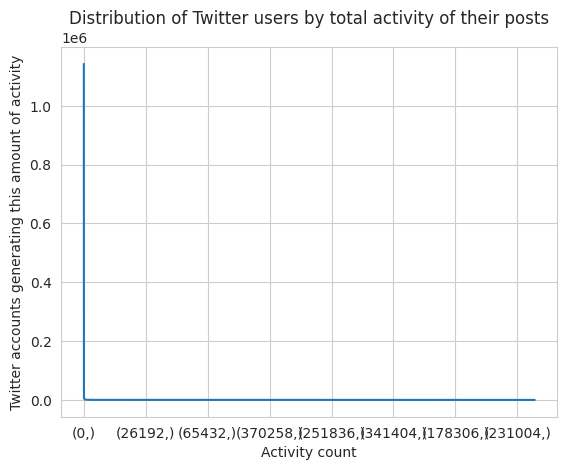

In [28]:
# TODO: policzyć takie same rozkłady dla wszystkich danych
activity.plot()
plt.title('Distribution of Twitter users by total activity of their posts')

plt.xlabel('Activity count')
plt.ylabel('Twitter accounts generating this amount of activity')

plt.show()

In [29]:
# Get the 3% of most active accounts
threshold = activity.quantile(0.99)
print(f"The threshold is {threshold}")

The threshold is 424.77999999999884


In [30]:
top_1_precent = dfp_activity[dfp_activity["activity_count"] >= threshold]

In [31]:
top_1_precent.sort_values("activity_count", ascending=False)

,activity_count
userid,
152930351,48761326
1891490382,14775030
4373117295,12310382
1495480590572961792,10824912
859767591811915776,10789902
...,...
1446038999169212417,426
1539132930089537536,426
558630367,426


In [32]:
%%time
# write most followed userid data to disk
# type(top_1_precent) => pandas.core.frame.DataFrame

top_1_precent.to_csv(
    '../parquet/most_interactions_userid.csv',
)

CPU times: user 2.78 s, sys: 115 ms, total: 2.89 s
Wall time: 2.92 s
